# BC3409 Individual Assignment

Name: Willis Yang Xianzu (U1921943A)

In [1]:
#import basic libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import joblib
import tensorflow as tf
sb.set()

In [2]:
#import dataset
credit=pd.read_csv("Credit Card Default II (balance).csv")
credit.head()

,income,age,loan,default
0,66155.92510,59.017015,8106.532131,0
1,34415.15397,48.117153,6564.745018,0
2,57317.17006,63.108049,8020.953296,0
3,42709.53420,45.751972,6103.642260,0
4,66952.68885,18.584336,8770.099235,1


## Data Exploration 

In [3]:
#basic info of variables
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3428 entries, 0 to 3427
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   income   3428 non-null   float64
 1   age      3428 non-null   float64
 2   loan     3428 non-null   float64
 3   default  3428 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 107.2 KB


In [4]:
credit.isnull().sum()

income     0
age        0
loan       0
default    0
dtype: int64

There are no NA values in the dataset.

Number of Default : 2
0    1714
1    1714
Name: default, dtype: int64


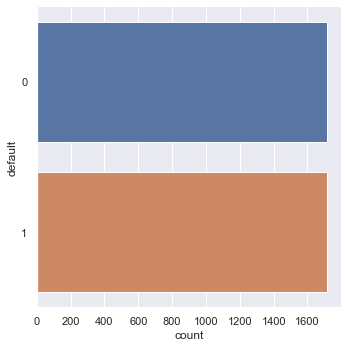

In [5]:
print("Number of Default :", len(credit["default"].unique()))

print(credit["default"].value_counts())
sb.catplot(y = "default", data = credit, kind = "count")

There is an equal number of 1 and 0 in default.

In [6]:
numeric_col = pd.DataFrame(credit[["income", "age", "loan"]])

numeric_col.describe().round(2)

,income,age,loan
count,3428.00,3428.00,3428.00
mean,45136.88,34.80,5591.99
std,14425.49,12.84,3174.52
min,20014.49,-52.42,1.38
25%,32827.21,25.17,3103.36
50%,45546.63,30.09,5540.31
75%,57514.79,44.37,7809.38
max,69995.69,63.97,13766.05


C:\Users\willi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\willi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\willi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

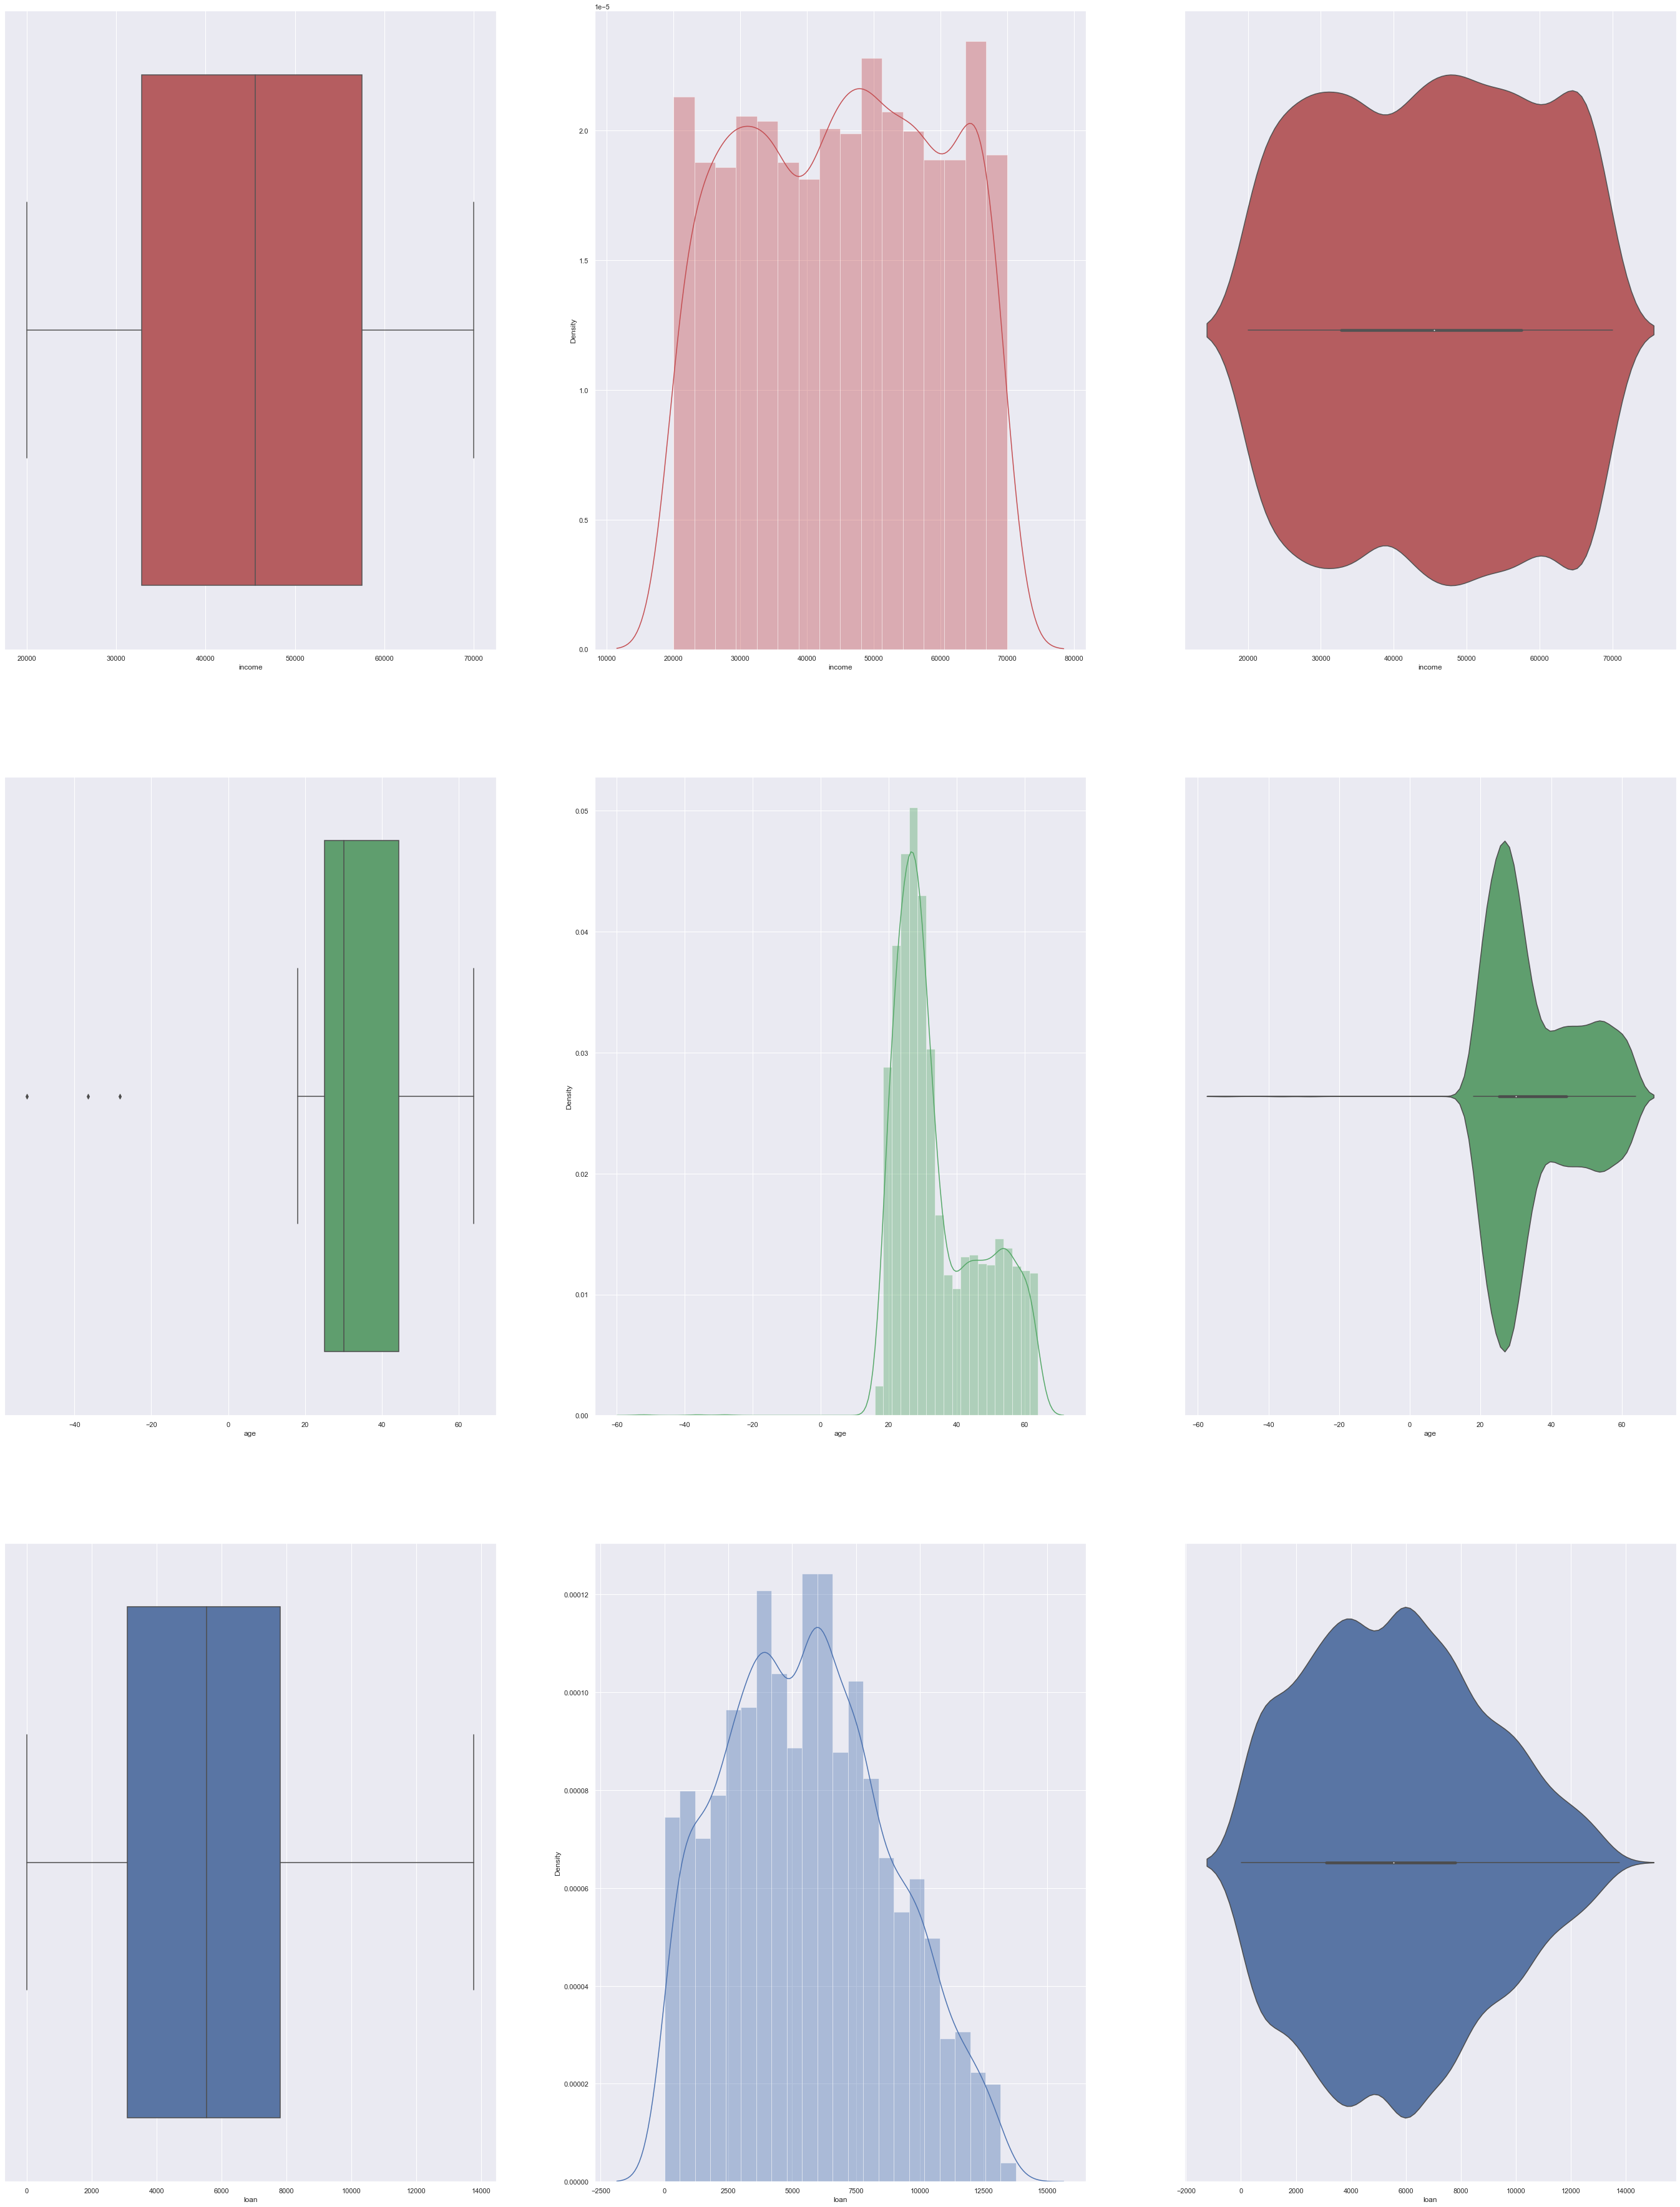

In [7]:
f, axes = plt.subplots(3, 3, figsize=(48, 64))
colors = ["r", "g", "b"]

count = 0
for var in numeric_col:
    sb.boxplot(numeric_col[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(numeric_col[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(numeric_col[var], color = colors[count], ax = axes[count,2])
    count += 1

As seen, there are 3 outliers in the 'age' variable.

C:\Users\willi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

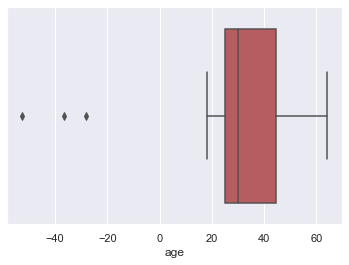

In [8]:
sb.boxplot(numeric_col["age"], orient = "h", color = "r")

In [9]:
lower_range = 25.17 - (1.5*30.09)
outlier_data=credit[credit['age']<lower_range]
outlier_data

,income,age,loan,default
15,50501.72669,-28.218361,3977.287432,0
21,32197.62070,-52.423280,4244.057136,0
26,63287.03891,-36.496976,9595.286289,0


As can be seen, 'age' cannot be negative and this will affect the results, hence, we will remove these rows.

In [10]:
credit=credit[credit['age']>lower_range]
credit.reset_index(drop=True, inplace=True)
credit.head()

,income,age,loan,default
0,66155.92510,59.017015,8106.532131,0
1,34415.15397,48.117153,6564.745018,0
2,57317.17006,63.108049,8020.953296,0
3,42709.53420,45.751972,6103.642260,0
4,66952.68885,18.584336,8770.099235,1


In [11]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3425 entries, 0 to 3424
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   income   3425 non-null   float64
 1   age      3425 non-null   float64
 2   loan     3425 non-null   float64
 3   default  3425 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 107.2 KB


<AxesSubplot:>

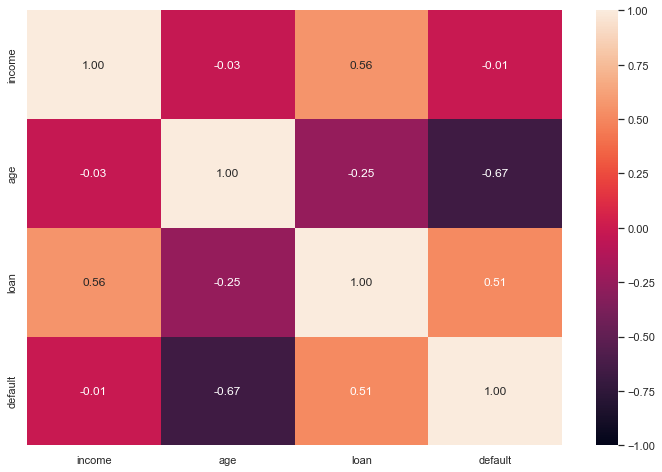

In [12]:
f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(credit.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

There is no strong correlation between the variables.

### Data Types

In [13]:
credit.dtypes

income     float64
age        float64
loan       float64
default      int64
dtype: object

In [14]:
credit['default']=credit['default'].astype('category')

C:\Users\willi\AppData\Local\Temp/ipykernel_1212/3274411305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit['default']=credit['default'].astype('category')


In [15]:
credit.dtypes

income      float64
age         float64
loan        float64
default    category
dtype: object

## Logistic Regression

In [16]:
#import main libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [17]:
y = pd.DataFrame(credit["default"])
x = pd.DataFrame(credit[["income", "age", "loan"]])

#Train-test split 70%-30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [18]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

print('Intercept of Regression \t: b = ', logreg.intercept_)
print('Coefficients of Regression \t: a = ', logreg.coef_)
print()

Intercept of Regression 	: b =  [14.15106668]
Coefficients of Regression 	: a =  [[-2.91739323e-04 -4.33120401e-01  2.07959761e-03]]



C:\Users\willi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
print(pd.DataFrame(list(zip(x_train.columns, logreg.coef_[0])), columns = ["Predictors", "Coefficients"]))


  Predictors  Coefficients
0     income     -0.000292
1        age     -0.433120
2       loan      0.002080


In [20]:
y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9491030454735085
Mean Squared Error (MSE) 	: 0.05089695452649145

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9426070038910506
Mean Squared Error (MSE) 	: 0.057392996108949414



The Logistic Regression model has a train dataset accuracy and test dataset accuracy of 94.9% and 94.3% respectively.

In [21]:
joblib.dump(logreg, "LogisticRegression")

['LogisticRegression']

## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [23]:
dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [24]:
from sklearn.metrics import accuracy_score
y_train_pred2 = dectree.predict(x_train)
y_test_pred2 = dectree.predict(x_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()

print("Accuracy Score (Train Data): ", accuracy_score(y_train, y_train_pred2))
print("Accuracy Score (Test Data): ", accuracy_score(y_test, y_test_pred2))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9415936587400918

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9289883268482491

Accuracy Score (Train Data):  0.9415936587400918
Accuracy Score (Test Data):  0.9289883268482491


<AxesSubplot:>

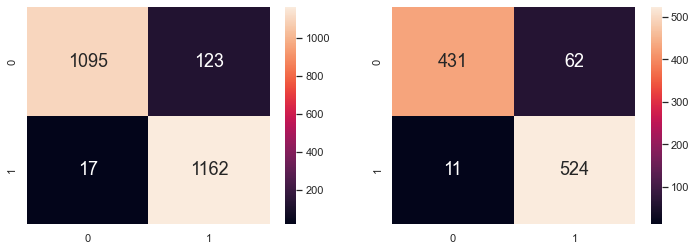

In [25]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred2),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

We have 94.1% accuracy in our train dataset predictions and 92.8% accuracy in our test dataset predictions.

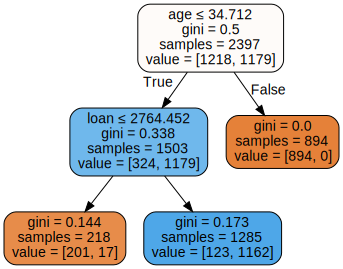

In [26]:
treedot = export_graphviz(dectree,                                      
                          feature_names = x_train.columns,              
                          out_file = None,                              
                          filled = True,                                
                          rounded = True,                               
                          special_characters = True)                    

graphviz.Source(treedot)

In [27]:
from sklearn.metrics import accuracy_score
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=gini', accuracy_score(y_test, pred))
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=entropy', accuracy_score(y_test, pred))

Criterion=gini 0.9834630350194552
Criterion=entropy 0.9902723735408561


The entropy method of 99.0% has a slight improvement over the gini method of 98.3%.

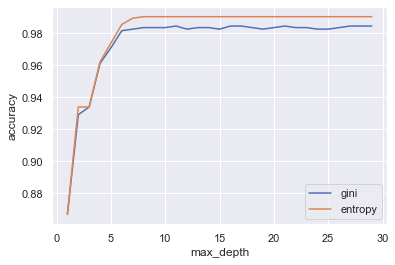

In [28]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(accuracy_score(y_test, pred))

 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_entropy.append(accuracy_score(y_test, pred))

 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

Both Gini and Entropy work relatively well for both shorter and longer trees as seen in the graph above. However we will use Entropy method since it has slight improvement over the Gini method.

In [29]:
d.iloc[d['acc_entropy'].idxmax()]

acc_gini       0.983463
acc_entropy    0.990272
max_depth      8.000000
Name: 7, dtype: float64

In [30]:
dectree = DecisionTreeClassifier(criterion='entropy', max_depth=8)
dectree.fit(x_train, y_train)
y_train_pred3 = dectree.predict(x_train)
y_test_pred3 = dectree.predict(x_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()

print("Accuracy Score (Train Data): ", accuracy_score(y_train, y_train_pred3))
print("Accuracy Score (Test Data): ", accuracy_score(y_test, y_test_pred3))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9995828118481435

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9902723735408561

Accuracy Score (Train Data):  0.9995828118481435
Accuracy Score (Test Data):  0.9902723735408561


Accuracy increased from 92.8% to 99.0%.

<AxesSubplot:>

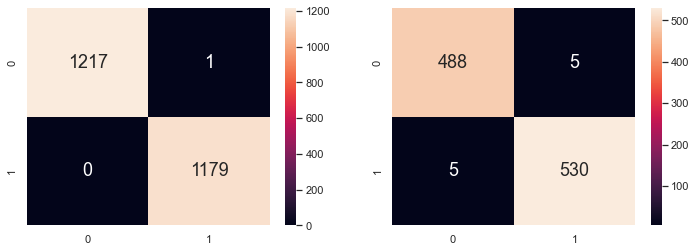

In [31]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred3),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred3), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

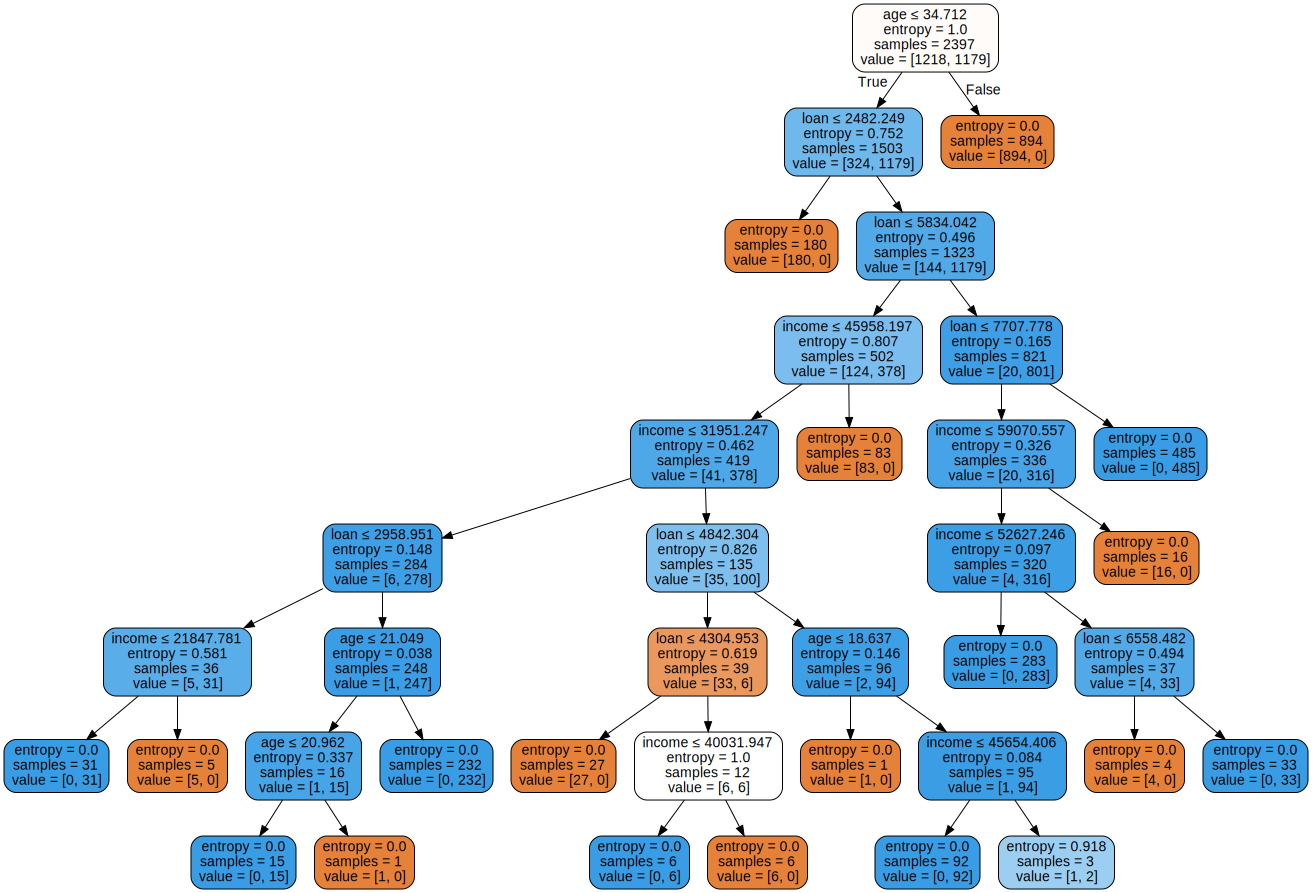

In [32]:
treedot = export_graphviz(dectree,                                      
                          feature_names = x_train.columns,              
                          out_file = None,                              
                          filled = True,                                
                          rounded = True,                               
                          special_characters = True)                    

graphviz.Source(treedot)

In [33]:
joblib.dump(dectree, "DecisionTree")

['DecisionTree']

## Random Forest

In [34]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

As income is the 10000s, loan is in the 1000s and age is in the 10s, we will be scaling the variables.

In [35]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(max_depth=2)
rforest.fit(X_train, y_train)
y_train_pred4 = rforest.predict(X_train)
y_test_pred4 = rforest.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

print("Accuracy Score (Train Data): ", accuracy_score(y_train, y_train_pred4))
print("Accuracy Score (Test Data): ", accuracy_score(y_test, y_test_pred4))

C:\Users\willi\AppData\Local\Temp/ipykernel_1212/3868773895.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, y_train)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9495202336253651

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9357976653696498

Accuracy Score (Train Data):  0.9495202336253651
Accuracy Score (Test Data):  0.9357976653696498


<AxesSubplot:>

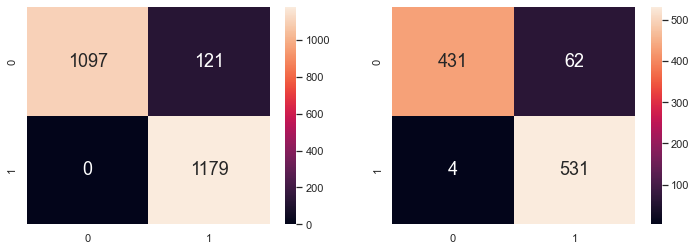

In [36]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred4),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred4), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

The accuracy of the Random Forest Classifier for train dataset is 95.0% and for test dataset is 93.6%. As calculated above, max_depth=8 will be optimal hence, we will run a random forest classifier with 8 max depths.

In [37]:
rforest = RandomForestClassifier(max_depth=8)
rforest.fit(X_train, y_train)
y_train_pred5 = rforest.predict(X_train)
y_test_pred5 = rforest.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

print("Accuracy Score (Train Data): ", accuracy_score(y_train, y_train_pred5))
print("Accuracy Score (Test Data): ", accuracy_score(y_test, y_test_pred5))

C:\Users\willi\AppData\Local\Temp/ipykernel_1212/40912415.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, y_train)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9929078014184397

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9785992217898832

Accuracy Score (Train Data):  0.9929078014184397
Accuracy Score (Test Data):  0.9785992217898832


<AxesSubplot:>

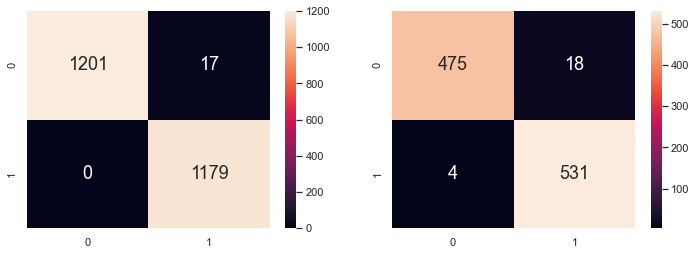

In [38]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred5),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred5), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Accuracy increased from 93.6% to 97.8%.

In [54]:
joblib.dump(rforest, "RandomForest")

['RandomForest']

## XGBoost

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
xgboost = GradientBoostingClassifier(max_depth=2)
xgboost.fit(x_train, y_train)
y_train_pred6 = xgboost.predict(x_train)
y_test_pred6 = xgboost.predict(x_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", xgboost.score(x_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", xgboost.score(x_test, y_test))
print()

print("Accuracy Score (Train Data): ", accuracy_score(y_train, y_train_pred6))
print("Accuracy Score (Test Data): ", accuracy_score(y_test, y_test_pred6))

C:\Users\willi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9929078014184397

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.980544747081712

Accuracy Score (Train Data):  0.9929078014184397
Accuracy Score (Test Data):  0.980544747081712


We have a train dataset accuracy score and test dataset accuracy score of 99.2% and 98.1% respectively. We will now change max_depth to 8 to improve accuracy.

<AxesSubplot:>

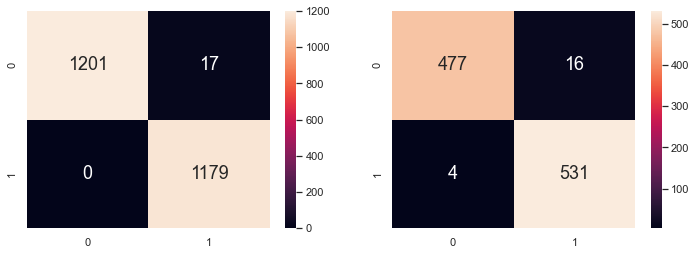

In [41]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred6),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred6), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [42]:
xgboost = GradientBoostingClassifier(max_depth=8)
xgboost.fit(x_train, y_train)
y_train_pred7 = xgboost.predict(x_train)
y_test_pred7 = xgboost.predict(x_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", xgboost.score(x_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", xgboost.score(x_test, y_test))
print()

print("Accuracy Score (Train Data): ", accuracy_score(y_train, y_train_pred7))
print("Accuracy Score (Test Data): ", accuracy_score(y_test, y_test_pred7))

C:\Users\willi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9873540856031129

Accuracy Score (Train Data):  1.0
Accuracy Score (Test Data):  0.9873540856031129


<AxesSubplot:>

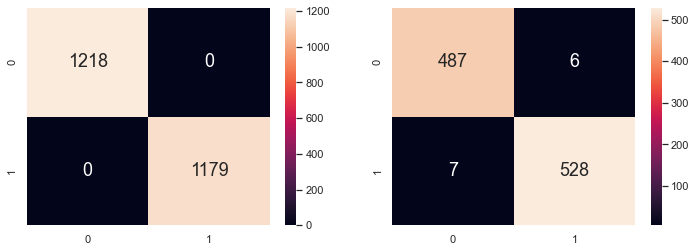

In [43]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred7),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred7), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Accuracy increases from 98.1% to 98.7%.

In [44]:
joblib.dump(xgboost, "XGBoost")

['XGBoost']

## Neural Network

In [45]:
#normalise the data
#Using Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [47]:
model=Sequential()
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adamax',metrics=['accuracy'])

In [48]:
model.fit(X_train, y_train, batch_size=10, epochs=15, verbose=1)
model.evaluate(X_train, y_train)

Epoch 1/15
240/240 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.5995
Epoch 2/15
240/240 [==============================] - 0s 1ms/step - loss: 0.6220 - accuracy: 0.6508
Epoch 3/15
240/240 [==============================] - 0s 1ms/step - loss: 0.5599 - accuracy: 0.7042
Epoch 4/15
240/240 [==============================] - 0s 992us/step - loss: 0.5049 - accuracy: 0.7651
Epoch 5/15
240/240 [==============================] - 0s 1ms/step - loss: 0.4616 - accuracy: 0.8144
Epoch 6/15
240/240 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.8444
Epoch 7/15
240/240 [==============================] - 0s 1ms/step - loss: 0.4004 - accuracy: 0.8661
Epoch 8/15
240/240 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 0.8828
Epoch 9/15
240/240 [==============================] - 0s 1ms/step - loss: 0.3586 - accuracy: 0.8924
Epoch 10/15
240/240 [==============================] - 0s 1ms/step - loss: 0.3441 - accuracy: 0.89

[0.28677141666412354, 0.9169795513153076]

In [49]:
model.evaluate(X_test, y_test)

33/33 [==============================] - 0s 879us/step - loss: 0.2914 - accuracy: 0.9105


[0.29144468903541565, 0.9105058312416077]

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [51]:
y_train_pred8 = model.predict(X_train)
y_train_pred8 = np.where(y_train_pred8>0.5,1,0)
y_test_pred8 = model.predict(X_test)
y_test_pred8 = np.where(y_test_pred8>0.5,1,0)

In [52]:
print("Accuracy Score (Train Data): ", accuracy_score(y_train, y_train_pred8))
print("Accuracy Score (Test Data): ", accuracy_score(y_test, y_test_pred8))

Accuracy Score (Train Data):  0.9169795577805591
Accuracy Score (Test Data):  0.9105058365758755


The accuracy of the neural network on train dataset and test dataset is 91.7% and 91.1% respectively.

In [53]:
model.save("NN")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: NN\assets


## Assumptions

1. All the information given are correct

2. The information given are not biased

3. Little to no collinearity between the variables as proven above

4. Assumption of no formal distributions. Being a non-parametric model, it can handle skewed and multi-modal data. This is specific for Random Forest